In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


1. Create a pie chart presenting the male/female proportion

(-1.1153965287301453,
 1.1087172349156638,
 -1.1129882265764364,
 1.1006184869798303)

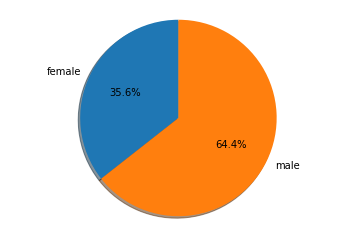

In [3]:
fig1, ax1 = plt.subplots()
s1=titanic.groupby('sex').count()['name']
ax1.pie(s1,labels=s1.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

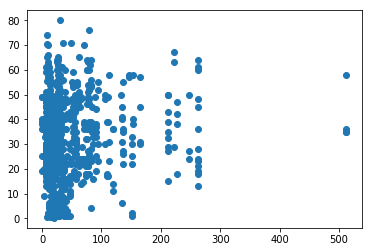

In [4]:

plt.scatter(titanic['fare'],titanic['age'])

In [5]:
import seaborn as sns

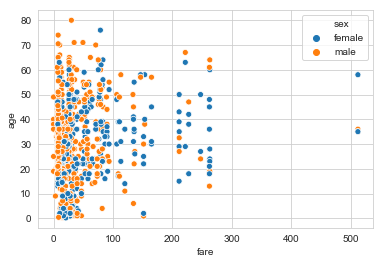

In [6]:
sns.set_style('whitegrid')
sns.scatterplot('fare','age',hue='sex',data=titanic)

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [8]:
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Max

array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])

In [9]:
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
Min

array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

Text(0, 0.5, 'Temperature(celsius)')

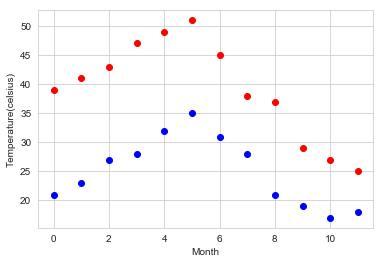

In [11]:
months = np.arange(12)
plt.plot(months, Max, 'ro')
plt.plot(months, Min, 'bo')
plt.xlabel('Month')
plt.ylabel('Temperature(celsius)')

Curve fitting using scipy

In [16]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      Min, [-40, 20, 0])

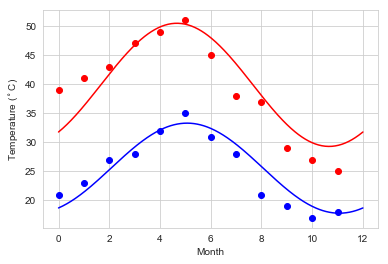

In [17]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()